# Revisão de Análise Vetorial

Este notebook tem a intenção de demonstrar alguns conceitos importantes que serão vistos ao longo do curso. Nele abordaremos os conceitos de vetores, algumas operações entre vetores e suas propriedades. Além disso, veremos alguns operadores vetoriais interessantes e seus significados matemáticos. 

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import noise

In [2]:
import plot_vectors as pv

## Vetores 

Vetores são segmentos de reta orientados, que possuem magnitude, direção e sentido. Os vetores desempenham papel crucial na Física para a descrição de algumas grandezas. Podemos representar os vetores de muitas formas tais como: $\mathbf{F}$, $\vec{F}$ ou $\bar{\mathbf{F}}$.

### Definindo vetores em Python

In [3]:
a = np.array([2.,0.,2.])
print (a)

[2. 0. 2.]


In [4]:
b = np.array([0.,2.,2.])
print (b)

[0. 2. 2.]


In [5]:
c = np.array([1.,2.,3.])
print (c)

[1. 2. 3.]


#### Soma : $\mathbf{a} + \mathbf{b}$

In [6]:
print (a + b)

[2. 2. 4.]


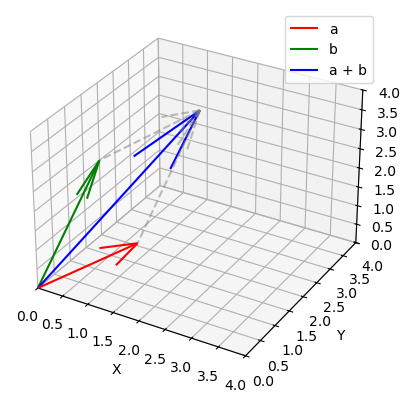

In [7]:
pv.plot_vector_sum(a,b)

#### Produto escalar : $\mathbf{a} \cdot \mathbf{b}$

In [8]:
print (np.dot(a,b))

4.0


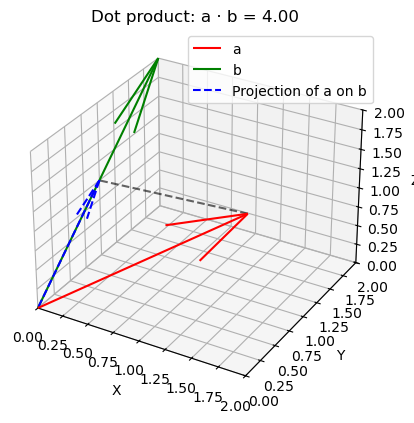

In [9]:
pv.plot_dot_product(a,b)

#### Produto vetorial : $\mathbf{a} \times \mathbf{b}$

In [10]:
print (np.cross(a,b))

[-4. -4.  4.]


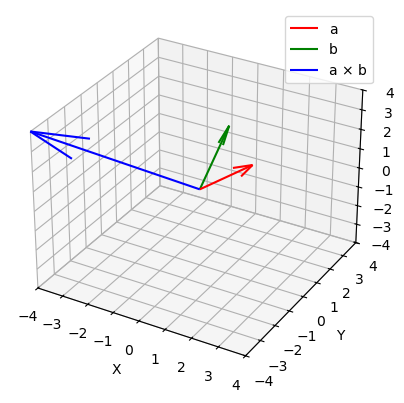

In [11]:
pv.plot_cross_product(a,b)

#### <ins>Propriedades<ins> :

1) $\mathbf{a} + \mathbf{b} = \mathbf{b} + \mathbf{a}$

In [12]:
np.allclose(a+b,b+a)

True

In [13]:
print (a+b)

[2. 2. 4.]


In [14]:
print (b+a)

[2. 2. 4.]


2. $\mathbf{a} \cdot \mathbf{b} = \mathbf{b} \cdot \mathbf{a}$

In [15]:
np.allclose(np.dot(a,b),np.dot(b,a))

True

In [16]:
print (np.dot(a,b))

4.0


In [17]:
print (np.dot(b,a))

4.0


3. $\mathbf{a} \times \mathbf{b} = - \mathbf{b} \times \mathbf{a}$

In [18]:
np.allclose(np.cross(a,b),-np.cross(b,a))

True

In [19]:
print (np.cross(a,b))

[-4. -4.  4.]


In [20]:
print (np.cross(b,a))

[ 4.  4. -4.]


4. $\mathbf{a}\cdot(\mathbf{b} + \mathbf{c}) = \mathbf{a} \cdot \mathbf{b} + \mathbf{a} \cdot \mathbf{c}$

In [21]:
np.allclose(np.dot(a,(b+c)), np.dot(a,b)+np.dot(a,c))

True

In [22]:
print (np.dot(a,(b+c)))

12.0


In [23]:
print (np.dot(a,b) + np.dot(a,c))

12.0


5. $\mathbf{a}\times(\mathbf{b} + \mathbf{c}) = \mathbf{a} \times \mathbf{b} + \mathbf{a} \times \mathbf{c}$

In [24]:
np.allclose(np.cross(a,(b+c)),np.cross(a,b) + np.cross(a,c))

True

In [25]:
print (np.cross(a,(b+c)))

[-8. -8.  8.]


In [26]:
print (np.cross(a,b) + np.cross(a,c))

[-8. -8.  8.]


## Campo vetorial 

Um campo vetorial é uma construção matemática que associa a cada ponto do espaço um vetor. Estes campos são utilizados, de forma geral, para descrevermos fisicamente alguns fenômenos, tais como a velocidade e direção de um fluido, um campo elétrico, um campo gravitacional, um campo magnético, dentre tantas outras aplicações. Genericamente, este campo vetorial $F: \mathbb{R}^3 \longrightarrow \mathbb{R}^3$  pode ser representado por:

$$ \mathbf{F}(x,y,z) = g(x,y,z) \, \hat{\mathbf{e}}_x + h(x,y,z) \, \hat{\mathbf{e}}_y + l(x,y,z) \, \hat{\mathbf{e}}_z .$$

**Definição formal:** Um *campo de vetores* em $A \subset \mathbb{R}^n$ é uma função

$$ F: A \subset \mathbb{R}^n \longrightarrow \mathbb{R}^n. $$ 
Seja $A \subset \mathbb{R}^n$ um conjunto aberto. O campo vetorial $F: A \subset \mathbb{R}^n \longrightarrow \mathbb{R}^n$ é dito contínuo, diferenciável e de classe $C^k$ em $\mathbf{u} \in A$ se todas as suas funções coordenadas $F_i :  A \subset \mathbb{R}^n \longrightarrow \mathbb{R}$ são contínuas, diferenciáveis ou de classe $C^k$ em $\mathbf{u} \in A$, respectivamente. 

#### Exemplo:

Seja $F: \mathbb{R}^2 - \{0,0\} \longrightarrow \mathbb{R}^2$ definida por:

$$ \mathbf{F}(x,y) = \left( \frac{-y}{\sqrt{x^2 + y^2}} , \frac{x}{\sqrt{x^2 + y^2}} \right) $$

In [27]:
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)

In [28]:
X,Y = np.meshgrid(x,y)

In [29]:
Fx = -Y/(np.sqrt(X**2 + Y**2) + 1e-10)
Fy = X/(np.sqrt(X*X + Y*Y)  + 1e-10)

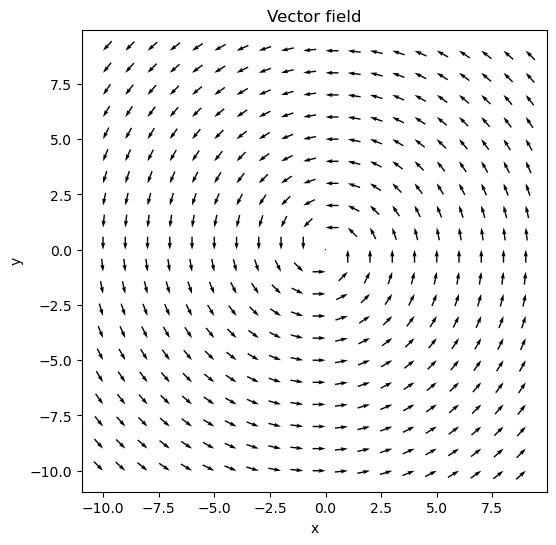

In [30]:
fig,ax = plt.subplots(figsize=(6,6))

q = ax.quiver(X, Y, Fx, Fy,pivot='tip',color='k')
ax.set_title('Vector field')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

## Campo gradiente

O campo gradiente de uma função escalar $f: A \subset \mathbb{R}^3 \longrightarrow \mathbb{R}$ é defindo como:

$$ \nabla f(x,y,z) = \left( \frac{\partial f}{\partial x}, \, \frac{\partial f}{\partial y}, \, \frac{\partial f}{\partial z} \right)$$.

#### Exemplo.1:

$f(x,y) = x^2 + y^2$, então: 

$$ \nabla f(x,y) = (2x,2y).$$ 

In [31]:
fxy = X*X + Y*Y

In [32]:
fx = 2*X
fy = 2*Y

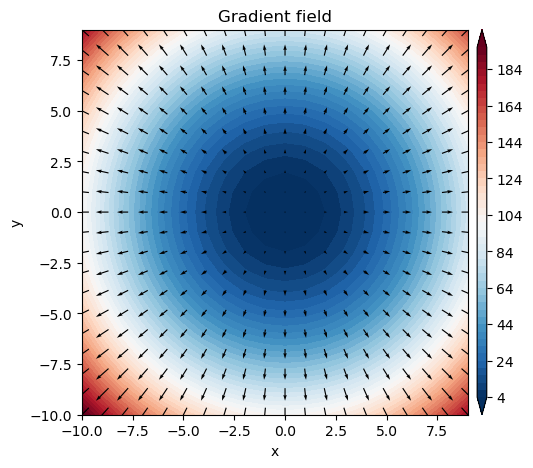

In [33]:
fig,ax = plt.subplots(figsize=(6,5))

cm = ax.contourf(X,Y,fxy,50,cmap='RdBu_r',extend='both')
q = ax.quiver(X, Y, fx, fy,pivot='mid',color='k')
fig.colorbar(cm, ax=ax,shrink=1.0,aspect=40,pad=0.02)
ax.set_title('Gradient field')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

#### Exemplo.2:

$f(x,y) = x^3 + y^3$, então: 

$$ \nabla f(x,y) = (3x^2,3y^2).$$ 

In [34]:
fxy = X**3 + Y**3

In [35]:
fx = 3*X*X
fy = 3*Y*y

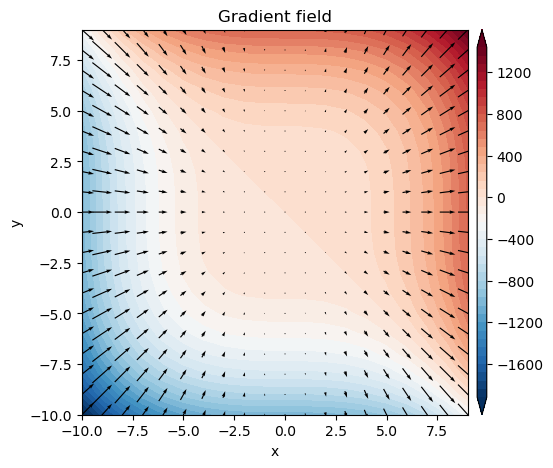

In [36]:
fig,ax = plt.subplots(figsize=(6,5))

cm = ax.contourf(X,Y,fxy,50,cmap='RdBu_r',extend='both')
q = ax.quiver(X, Y, fx, fy,pivot='mid',color='k')
fig.colorbar(cm, ax=ax,shrink=1.0,aspect=40,pad=0.02)
ax.set_title('Gradient field')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()